In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("adult.csv")

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19418 entries, 0 to 19417
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              19418 non-null  int64  
 1   workclass        19418 non-null  object 
 2   fnlwgt           19418 non-null  int64  
 3   education        19418 non-null  object 
 4   educational-num  19418 non-null  int64  
 5   marital-status   19418 non-null  object 
 6   occupation       19418 non-null  object 
 7   relationship     19417 non-null  object 
 8   race             19417 non-null  object 
 9   gender           19417 non-null  object 
 10  capital-gain     19417 non-null  float64
 11  capital-loss     19417 non-null  float64
 12  hours-per-week   19417 non-null  float64
 13  native-country   19417 non-null  object 
 14  income           19417 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 2.2+ MB


In [ ]:
#numerical distribution
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,19418.000000,1.941800e+04,19418.000000,19417.000000,19417.000000,19417.000000
mean,38.774848,1.894894e+05,10.077351,1073.547098,89.447958,40.416233
std,13.804124,1.056916e+05,2.565492,7505.221020,406.068843,12.420713
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.169790e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778355e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.385670e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [ ]:
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,19418,19418,19418,19418,19417,19417,19417,19417,19417
unique,9,16,7,16,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,13358,6291,8830,2418,7773,16619,12986,17481,14800


In [ ]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,1
race,1
gender,1


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
#gives unique values in the column
df.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
#distinct value counts of column
df.workclass.value_counts()

,count
workclass,
Private,13358
Self-emp-not-inc,1568
Local-gov,1250
?,1164
State-gov,813
Self-emp-inc,696
Federal-gov,558
Without-pay,8
Never-worked,3


In [ ]:
df.education.value_counts()

,count
education,
HS-grad,6291
Some-college,4286
Bachelors,3197
Masters,1109
Assoc-voc,813
11th,772
Assoc-acdm,631
10th,543
7th-8th,367


In [ ]:
df.replace("?", np.nan, inplace=True)
#or
# df.loc[df['native-country'] == '?', 'native-country'] = "India"


In [ ]:
df.isna().sum()

,0
age,0
workclass,1164
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,1167
relationship,1
race,1
gender,1


In [ ]:
df['occupation'].fillna(df['occupation'].mode()[0],inplace=True)

In [ ]:
df['workclass'].fillna(df['workclass'].mode()[0],inplace=True)

In [ ]:
df['native-country'].fillna(df['native-country'].mode()[0],inplace=True)

In [ ]:
df.dropna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_numeric
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19412,25,Private,237865,Some-college,10,Never-married,Prof-specialty,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,0
19413,43,Private,300528,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K,0
19414,45,Private,67716,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,10520.0,0.0,48.0,United-States,>50K,1
19415,48,Federal-gov,326048,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,44.0,United-States,>50K,1


In [ ]:
df['occupation'].mode()

,occupation
0,Prof-specialty


In [ ]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,1
race,1
gender,1


In [ ]:
df.occupation.value_counts()

,count
occupation,
Prof-specialty,3585
Exec-managerial,2407
Craft-repair,2394
Sales,2233
Adm-clerical,2200
Other-service,1942
Machine-op-inspct,1217
Transport-moving,914
Handlers-cleaners,821


In [ ]:
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    print(f"Unique values in {col}:")
    print(df[col].value_counts())
    print("\n" + "-"*50 + "\n")

Unique values in workclass:
workclass
Private             14522
Self-emp-not-inc     1568
Local-gov            1250
State-gov             813
Self-emp-inc          696
Federal-gov           558
Without-pay             8
Never-worked            3
Name: count, dtype: int64

--------------------------------------------------

Unique values in education:
education
HS-grad         6291
Some-college    4286
Bachelors       3197
Masters         1109
Assoc-voc        813
11th             772
Assoc-acdm       631
10th             543
7th-8th          367
Prof-school      314
9th              289
12th             254
Doctorate        215
5th-6th          206
1st-4th           95
Preschool         36
Name: count, dtype: int64

--------------------------------------------------

Unique values in marital-status:
marital-status
Married-civ-spouse       8830
Never-married            6461
Divorced                 2622
Widowed                   633
Separated                 600
Married-spouse-absent   

In [ ]:
# value in occupation column which is used mostly
df.occupation.value_counts().idxmax()


'Prof-specialty'

In [ ]:
#least used value in occupation column
df.occupation.value_counts().idxmin()

'Farm'

In [ ]:
#education level with highest number of people

df.education.value_counts().idxmax()

'HS-grad'

In [ ]:
#average age of people earning

df.groupby(['income','gender'])["age"].agg('mean')

income  gender
<=50K   Female    36.440791
        Male      37.423098
>50K    Female    42.438375
        Male      44.667692
Name: age, dtype: float64

In [ ]:
#distribution of hours-per-week among different workclasses?

df.groupby(['workclass','gender']).agg(mean_hrs=('hours-per-week','mean'),
                              max_hrs=('hours-per-week','max'),
                              min_hrs=('hours-per-week','min'))
#

mean_hrs  max_hrs  min_hrs
workclass        gender                             
Federal-gov      Female  39.443787     72.0      5.0
                 Male    42.874036     99.0      4.0
Local-gov        Female  38.747059     75.0      3.0
                 Male    41.891892     99.0      5.0
Never-worked     Female  20.000000     20.0     20.0
                 Male    35.000000     35.0     35.0
Private          Female  35.906871     99.0      1.0
                 Male    41.631791     99.0      1.0
Self-emp-inc     Female  41.428571     99.0      6.0
                 Male    49.476033     99.0      1.0
Self-emp-not-inc Female  38.323077     99.0      1.0
                 Male    45.462127     99.0      2.0
State-gov        Female  36.792453     99.0      5.0
                 Male    40.355556     99.0      1.0
Without-pay      Female  43.333333     50.0     40.0
                 Male    35.000000     60.0     10.0

In [ ]:
df.groupby(['workclass'])['hours-per-week'].describe()

,count,mean,std,min,25%,50%,75%,max
workclass,,,,,,,,
Federal-gov,558.0,41.835125,9.060423,4.0,40.0,40.0,40.00,99.0
Local-gov,1250.0,40.608800,10.893167,3.0,40.0,40.0,44.00,99.0
Never-worked,3.0,30.000000,8.660254,20.0,27.5,35.0,35.00,35.0
Private,14522.0,39.629528,11.757761,1.0,40.0,40.0,44.00,99.0
Self-emp-inc,696.0,48.423851,14.619981,1.0,40.0,49.0,60.00,99.0
Self-emp-not-inc,1567.0,44.277601,16.775511,1.0,36.0,40.0,50.50,99.0
State-gov,813.0,38.961870,12.285691,1.0,38.0,40.0,40.00,99.0
Without-pay,8.0,38.125000,16.021749,10.0,35.0,40.0,46.25,60.0


In [ ]:
#correlation between income, capital_gain, and capital_loss
df["income_numeric"] = df["income"].apply(lambda x: 1 if x == ">50K" else 0)

In [ ]:
df[['income_numeric','capital-gain', 'capital-loss']].corr()

,income_numeric,capital-gain,capital-loss
income_numeric,1.000000,0.221947,0.141173
capital-gain,0.221947,1.000000,-0.031510
capital-loss,0.141173,-0.031510,1.000000


In [ ]:
#gender distribution
df.gender.value_counts()

,count
gender,
Male,12986
Female,6431


In [ ]:
#gender distribution in income category
df.groupby(['race','income'])['income'].value_counts()



race                income
Amer-Indian-Eskimo  <=50K       168
                    >50K         20
Asian-Pac-Islander  <=50K       410
                    >50K        165
Black               <=50K      1670
                    >50K        216
Other               <=50K       123
                    >50K         26
White               <=50K     12429
                    >50K       4190
Name: count, dtype: int64

In [ ]:
#percentage of people earnging more than 50K
df.groupby('race')['income'].apply(lambda x: (x == '>50K').mean() * 100)

,income
race,
Amer-Indian-Eskimo,10.638298
Asian-Pac-Islander,28.695652
Black,11.452810
Other,17.449664
White,25.212107


In [ ]:
#average hours-per-week worked by people earning >50K vs. <=50K

df.groupby(['income'])['hours-per-week'].agg('mean')

,hours-per-week
income,
<=50K,38.838919
>50K,45.472385


In [ ]:
#top 5 workclasses where people earn >50K
df.groupby(['workclass'])['income'].apply(lambda x:(x == '>50K').sum()).sort_values(ascending=False).head(5)

,income
workclass,
Private,3005
Self-emp-not-inc,420
Self-emp-inc,394
Local-gov,356
Federal-gov,224


In [ ]:
# income distribution across different education levels?


df.groupby(['income', 'education'])['income'].agg('count').sort_values(ascending=False)


income  education   
<=50K   HS-grad         5282
        Some-college    3488
        Bachelors       1883
>50K    Bachelors       1314
        HS-grad         1009
        Some-college     797
<=50K   11th             732
        Assoc-voc        617
>50K    Masters          591
<=50K   Masters          518
        10th             514
        Assoc-acdm       448
        7th-8th          340
        9th              274
        12th             236
>50K    Prof-school      231
        Assoc-voc        196
<=50K   5th-6th          193
>50K    Assoc-acdm       183
        Doctorate        150
<=50K   1st-4th           92
        Prof-school       83
        Doctorate         65
>50K    11th              40
<=50K   Preschool         35
>50K    10th              29
        7th-8th           27
        12th              18
        9th               15
        5th-6th           13
        1st-4th            3
        Preschool          1
Name: income, dtype: int64

In [ ]:
df.groupby(['income', 'education'])['income'].count().groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False))


income  education   
<=50K   HS-grad         5282
        Some-college    3488
        Bachelors       1883
        11th             732
        Assoc-voc        617
        Masters          518
        10th             514
        Assoc-acdm       448
        7th-8th          340
        9th              274
        12th             236
        5th-6th          193
        1st-4th           92
        Prof-school       83
        Doctorate         65
        Preschool         35
>50K    Bachelors       1314
        HS-grad         1009
        Some-college     797
        Masters          591
        Prof-school      231
        Assoc-voc        196
        Assoc-acdm       183
        Doctorate        150
        11th              40
        10th              29
        7th-8th           27
        12th              18
        9th               15
        5th-6th           13
        1st-4th            3
        Preschool          1
Name: income, dtype: int64

In [ ]:
df.groupby(['education','income'])['income'].count().groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False))


education     income
10th          <=50K      514
              >50K        29
11th          <=50K      732
              >50K        40
12th          <=50K      236
              >50K        18
1st-4th       <=50K       92
              >50K         3
5th-6th       <=50K      193
              >50K        13
7th-8th       <=50K      340
              >50K        27
9th           <=50K      274
              >50K        15
Assoc-acdm    <=50K      448
              >50K       183
Assoc-voc     <=50K      617
              >50K       196
Bachelors     <=50K     1883
              >50K      1314
Doctorate     >50K       150
              <=50K       65
HS-grad       <=50K     5282
              >50K      1009
Masters       >50K       591
              <=50K      518
Preschool     <=50K       35
              >50K         1
Prof-school   >50K       231
              <=50K       83
Some-college  <=50K     3488
              >50K       797
Name: income, dtype: int64

In [ ]:
education_income = df.groupby("education")["income"].apply(lambda x: (x == ">50K").mean() * 100).sort_values(ascending=False)


In [ ]:
education_income

,income
education,
Prof-school,73.566879
Doctorate,69.767442
Masters,53.291253
Bachelors,41.101032
Assoc-acdm,29.001585
Assoc-voc,24.108241
Some-college,18.595427
HS-grad,16.038786
7th-8th,7.356948


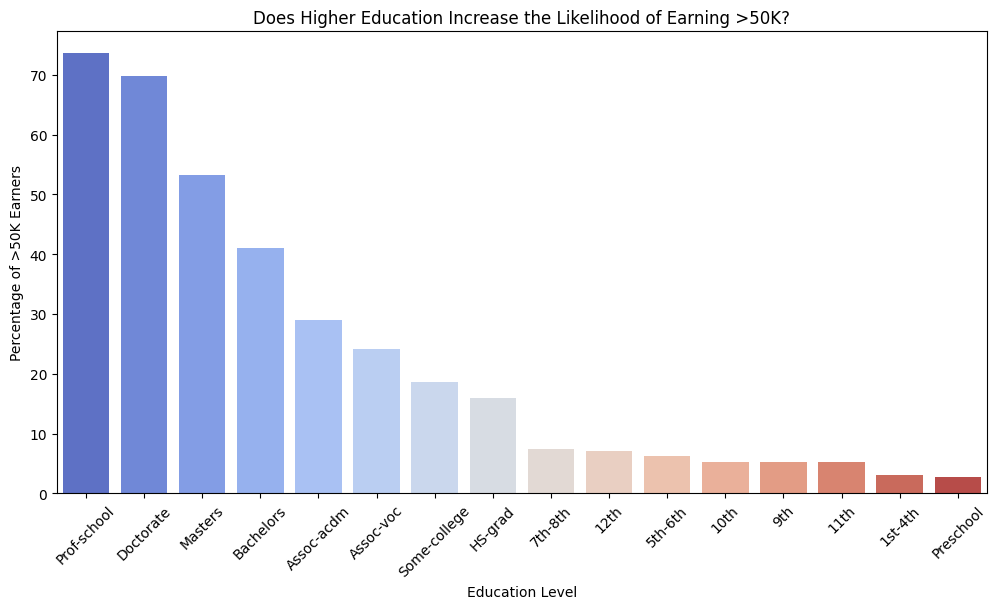

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=education_income.index, y=education_income.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Education Level")
plt.ylabel("Percentage of >50K Earners")
plt.title("Does Higher Education Increase the Likelihood of Earning >50K?")
plt.show()

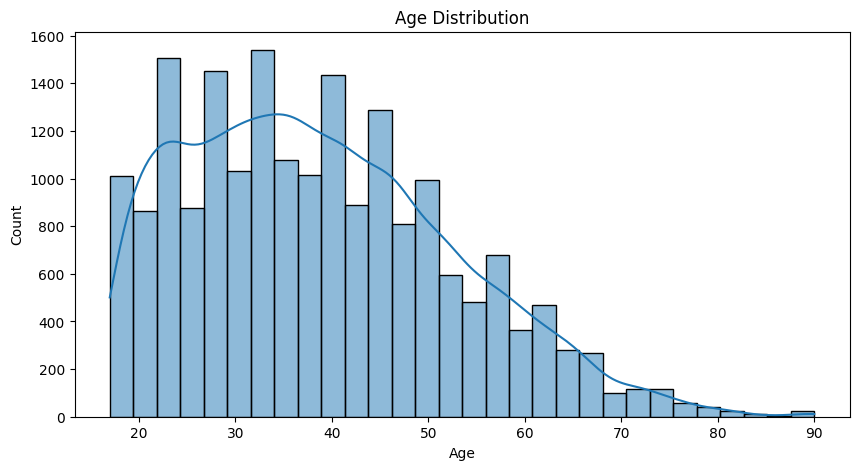

In [ ]:
#distribution of age

plt.figure(figsize=(10, 5))
sns.histplot(df['age'],bins=30,kde='true')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

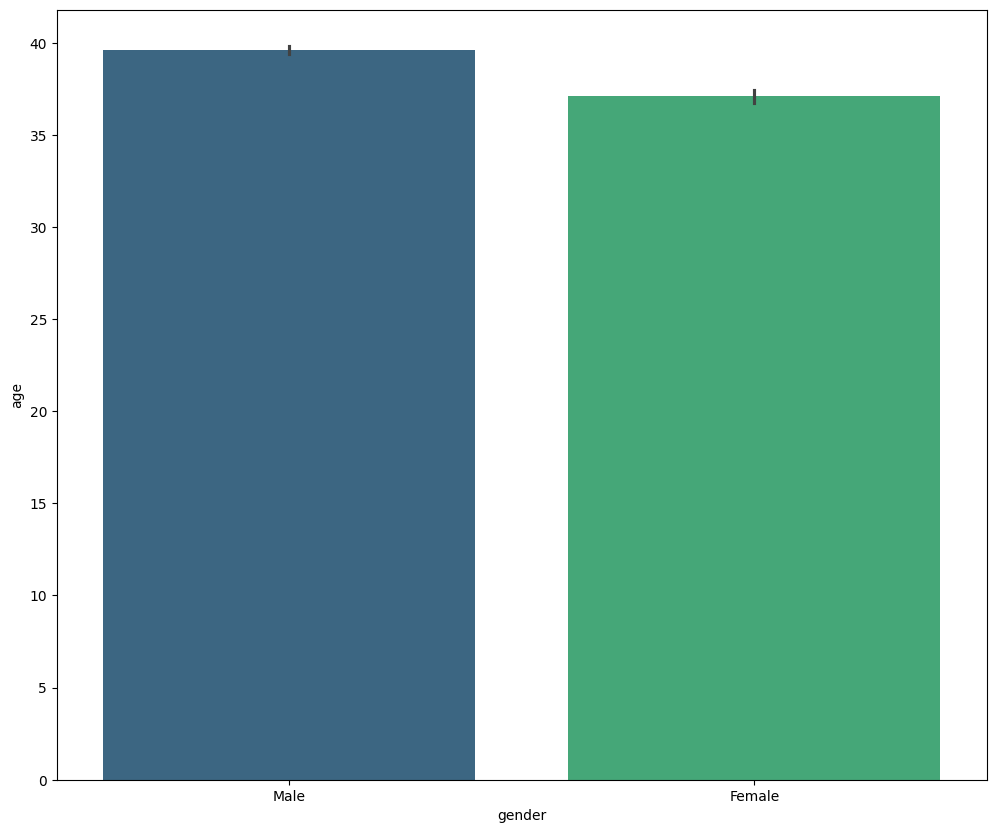

In [ ]:
#age vs gender

plt.figure(figsize=(12,10))
sns.barplot(x=df["gender"], y=df["age"], estimator=np.mean, palette="viridis")
plt.xlabel = 'Gender'
plt.ylabel='Age'
plt.title = 'Age vs Gender'
plt.show()

TypeError: 'str' object is not callable

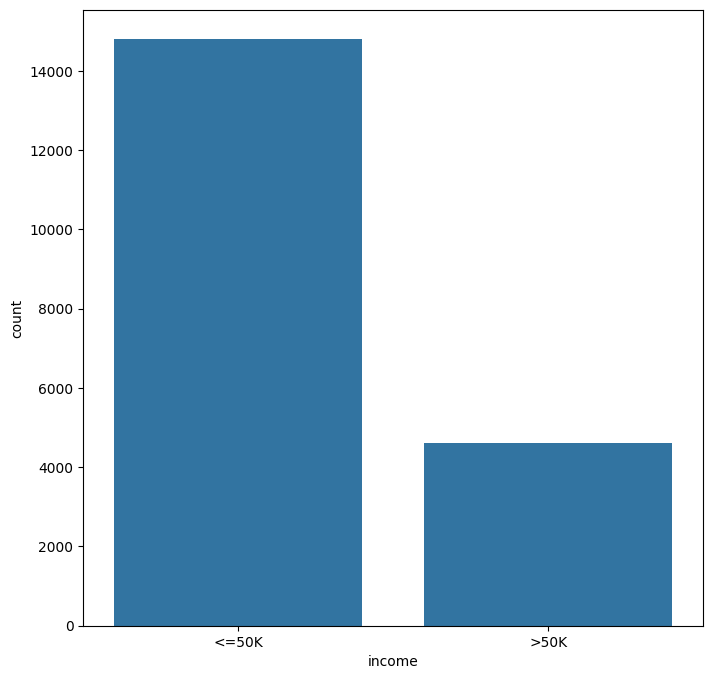

In [ ]:
#Income Distribution

plt.figure(figsize=(8,8))
sns.countplot(x="income", data=df)
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Distribution of income")
plt.show()

TypeError: 'str' object is not callable

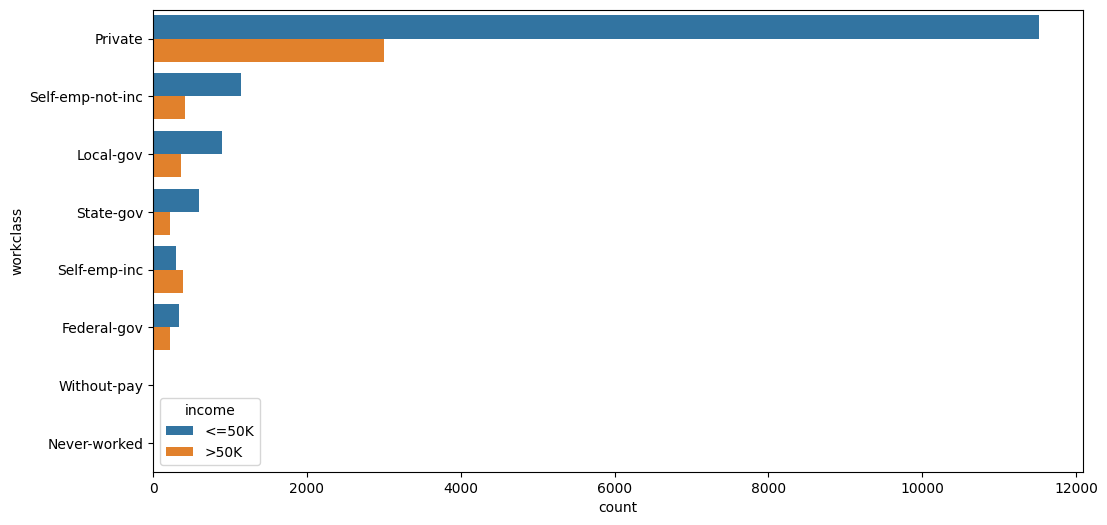

In [ ]:
#workclass vs income
plt.figure(figsize=(12, 6))
sns.countplot(y="workclass", hue="income", data=df, order=df["workclass"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Workclass")
plt.title("Workclass vs. Income Distribution")

plt.show()


TypeError: 'str' object is not callable

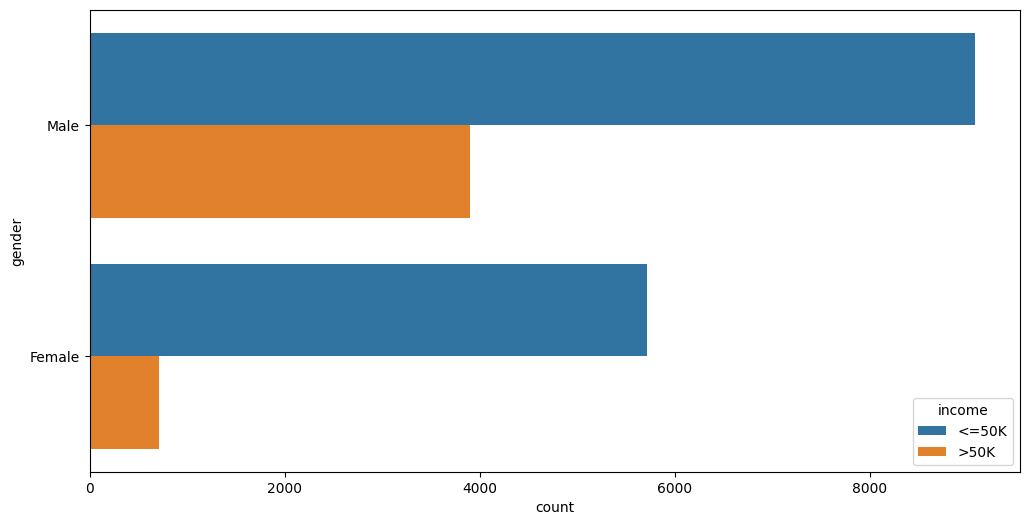

In [ ]:
#gender vs income
plt.figure(figsize=(12, 6))
sns.countplot(y="gender", hue="income", data=df, order=df["gender"].value_counts().index)
plt.title("gender vs. Income Distribution")
plt.xlabel("Count")
plt.ylabel("gender")
plt.show()

TypeError: 'str' object is not callable

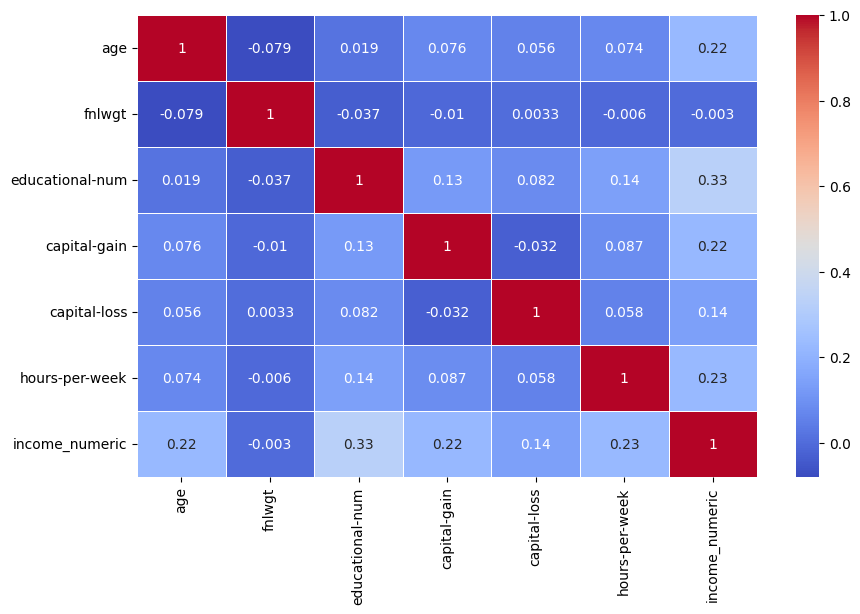

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
